# Root finding methods

These are a collection of methods used to find the points where 1D functions are zero.


#### Reference:

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.00-Root-Finding.html


## Example:

Find the roots of:

$f(x) = x^2 -1$

Obviously they are:

$x = \pm 1$

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## 1. Using scipy.optimize()

In [2]:
# Create x axis

x = np.arange(-2., 2., 0.01)

In [3]:
# Define function

func = lambda x: x**2 - 1

In [4]:
# Evaluate function

y = func(x)

In [5]:
# Check shape

print(x.shape, y.shape)

(400,) (400,)


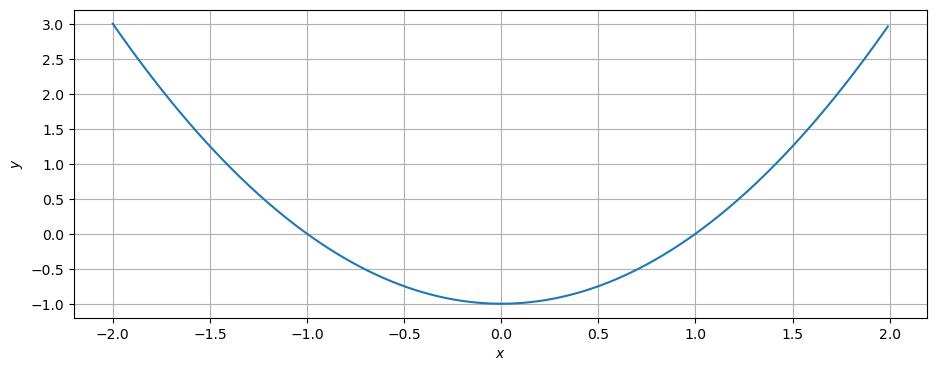

In [7]:
plt.figure(figsize=(11,4))

plt.plot(x, y)

plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [8]:
# Call root finder

roots_func = opt.fsolve(func, [-1.5, 5.])

In [9]:
print(roots_func)

[-1.  1.]


## 2. Imaginary roots using numpy.roots()

$f(x) = ax^2+bx+c$

In our example:
$f(x) = 1*x^2-0*x-1$

Therefore:

$a=1$

$b=0$

$c=-1$

In [10]:
roots_func_method2 = np.roots([1, 0, -1])

print(roots_func_method2)

[-1.  1.]



## Example 2 (complex roots):

Find the roots of:

$f(x) = x^2 +1$

$x = \pm i$

In [11]:
func2 = lambda x: x**2 + 1

In [12]:
y2 = func2(x)

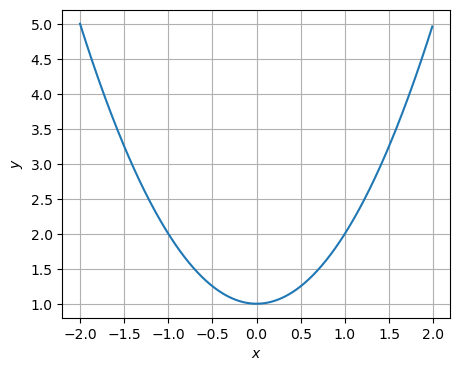

In [13]:
plt.figure(figsize=(5,4))

plt.plot(x, y2)

plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [14]:
roots_func2 = opt.fsolve(func2, [-10, 20])

print(roots_func2)

[0.00702168 0.00364742]


/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


### NOTE: We can use np.roots() for complex roots.

In [15]:
roots_func2 = np.roots([1, 0, +1])

print(roots_func2) #these are not the roots, but the values of the last iteration.

[-0.+1.j  0.-1.j]


## 3. Newton-Rhapson method:

#### Reference:

https://en.wikipedia.org/wiki/Newton%27s_method


$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [16]:
func = lambda x: x**2 - 1

func_prime = lambda x: 2*x

In [18]:
# First guess:
x_0 = 2.0
print(func(x_0))

# First iteration
x_1 = x_0 - (func(x_0))/(func_prime(x_0))

3.0


In [19]:
print(x_1)
print(func(x_1))

1.25
0.5625


In [20]:
x_2 = x_1 - (func(x_1))/(func_prime(x_1))

In [21]:
print(x_2)
print(func(x_2))

1.025
0.05062499999999992


In [22]:
x_3 = x_2 - (func(x_2))/(func_prime(x_2))

In [23]:
print(x_3)
print(func(x_3))

1.0003048780487804
0.0006098490481853958


In [24]:
x_4 = x_3 - (func(x_3))/(func_prime(x_3))

In [25]:
print(x_4)
print(func(x_4))

1.0000000464611474
9.292229696811205e-08


In [36]:
print(func(x_4))

9.292229696811205e-08


#### Function:

In [26]:
def newton_rhapson(func, func_prime, x_0, tolerance):
    
    """
    Function to find roots based on the NR method.
    User should provide a tolerance value at which iteration stops.
    """
    
    if abs(func(x_0)) < tolerance:
        return x_0
    else:
        return newton_rhapson(func, func_prime, x_0 - (func(x_0))/(func_prime(x_0)), tolerance)

In [30]:
# 2 guesses
x_0 = 2.0
x_00 = -10

# Call our N-R function
root_1 = newton_rhapson(func, func_prime, x_0, 1.e-15)
root_2 = newton_rhapson(func, func_prime, x_00, 1.e-15)

In [31]:
print(root_1, root_2)

1.0 -1.0


## 4. Bisection method:

https://en.wikipedia.org/wiki/Bisection_method

In [32]:
# 1. Get mid point
a = 0.
b = 2.5
tolerance = 1.e-7

c = (a + b)/2

# 2. Evaluate function in c
y = func(c)

In [33]:
print(c, y)

1.25 0.5625


In [34]:
b1 = c

c1 = (a + b1)/2

y1 = func(c1)

In [35]:
print(c1, y1)

0.625 -0.609375


In [36]:
a2 = c1
b2 = c

c2 = (a2 + b2)/2
y2 = func(c2)

In [37]:
print(c2, y2)

0.9375 -0.12109375


In [38]:
a3 = c2
b3 = c

c3 = (a3 + b3)/2
y3 = func(c3)

print(c3, y3)

1.09375 0.1962890625


#### Function:

In [39]:
def bisection(func, a, b, tolerance):
    """
    Function to find the roots based on getting points on each side and then the mid point
    The user should indicate the tolerance and then call the function recursively.
    
    """
    c = (a + b)/2
    c_1.append(c)
    
    if np.abs(func(c)) < tolerance:
        return c
    
    elif np.sign(func(a)) == np.sign(func(c)):
        return bisection(func, c, b, tolerance)
    
    elif np.sign(func(b)) == np.sign(func(c)):  
        return bisection(func, a, c, tolerance)        

In [40]:
a_0 = 0
b_0 = 2.5

a_00 = -2.2
b_00 = 0.1
tolerance = 1.e-12

c_1 = []
root_1 = bisection(func, a_0, b_0, tolerance)
root_2 = bisection(func, a_00, b_00, tolerance)
print(root_1, root_2)

1.0000000000002274 -0.999999999999545


In [41]:
print(len(c_1))

81


In [42]:
import time

In [45]:
start = time.time()

root_1 = bisection(func, a_0, b_0, tolerance)

end  = time.time()

print(end - start)

0.00020694732666015625
